In [1]:
import numpy as np
import scipy.misc
from scipy.fftpack import dct, idct
import sys
from PIL import Image
import matplotlib.pyplot as plt
import random
from tqdm import tqdm_notebook as tqdm
from scipy.fftpack import dct, idct
%matplotlib inline

In [26]:
class ImageLoader:
    def __init__(self,FILE_PATH):
            self.img = np.array(Image.open(FILE_PATH))
            
    def get_points(self,POINT):
        Row = random.randint(0,len(self.img)-POINT-1)
        Col = random.randint(0,len(self.img)-1)
        return self.img[Row:Row+POINT,Col]
    
    # ランチョスしたのを返す
    def Lanczos(self,data):
        points = len(data)
        left = int(data[0])
        right = int(data[len(data)-1])

        result = np.zeros(points)
        for i in range(points):
            result[i] = data[i] - ((right-left)*i/(points-1) + left)
            
        return result
    
    def get_points_lanczos(self,POINT):
        return Lanczos(self.get_points(POINT))

In [34]:
class DCT:
    def __init__(self,N):
        self.N = N # データ数
        # 1次元DCTの基底ベクトルの生成
        self.phi_1d = np.array([ self.phi(i) for i in range(self.N)])
                
    def phi(self,k):
        """ 離散コサイン変換(DCT)の基底関数 """
        # DCT-II
        if k == 0:
            return np.ones(self.N)/np.sqrt(self.N)
        else:
            return np.sqrt(2.0/self.N)*np.cos((k*np.pi/(2*self.N))*(np.arange(self.N)*2+1))
        
    def dct(self,data):
        """ 1次元離散コサイン変換を行う """
        return self.phi_1d.dot(data)

    def idct(self,c):
        """ 1次元離散コサイン逆変換を行う """
        return np.sum( self.phi_1d.T * c)

# 画像の用意

In [27]:
lenna = ImageLoader("LENNA.bmp")

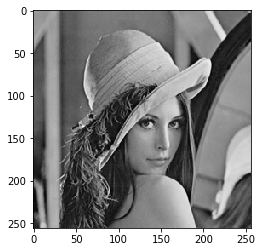

In [21]:
plt.imshow(lenna.img,"gray")

## ランダムでN点取得

In [29]:
point = lenna.get_points(8)

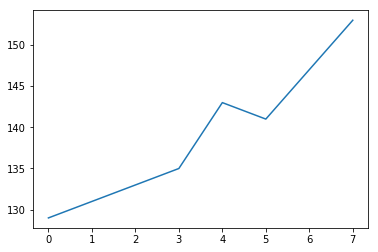

In [31]:
plt.plot(point)

## ランチョスしたやつ

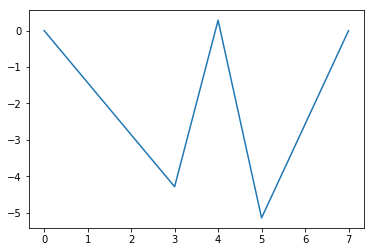

In [33]:
plt.plot(lenna.Lanczos(point))

# DCT

In [35]:
dct = DCT(8)

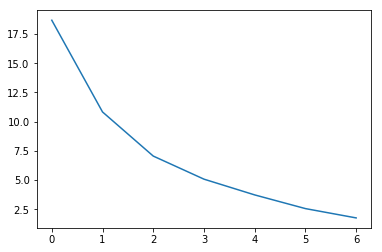

In [49]:
LOOP_COUNT = 10000
img_F = np.zeros(8)
for i in tqdm(range(LOOP_COUNT)):
    img_F += abs(dct.dct(lenna.get_points(8)))
    
img_F /= LOOP_COUNT

plt.plot(img_F[1:])

# FFT

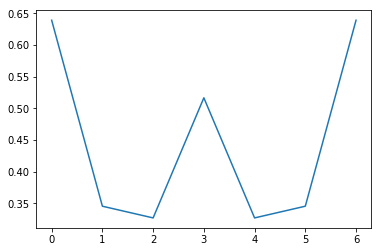

In [57]:
LOOP_COUNT = 10000
img_F = np.zeros(8).astype(np.complex128)

for i in tqdm(range(LOOP_COUNT)):
    img_F += np.fft.fft(lenna.get_points(8))
    
img_F /= LOOP_COUNT

plt.figure()
plt.plot(img_F[1:])

FFTだからFs/2:ナイキスト周波数を堺に左右反転したようになる。
https://www.logical-arts.jp/archives/112

# DCT + ランチョス

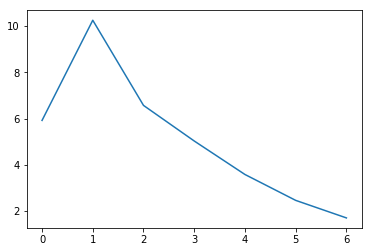

In [61]:
LOOP_COUNT = 10000
img_F = np.zeros(8)
for i in tqdm(range(LOOP_COUNT)):
    img_F += abs(dct.dct(lenna.get_points_lanczos(8)))
    
img_F /= LOOP_COUNT

plt.plot(img_F[1:])